<font size="5"><p style="text-align: center;">**Visualisation avec Pandas**</font></p> 

In [1]:
# Importation library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Création d'un dataframe
df=pd.DataFrame(np.random.rand(50,1)*100, columns=['vitesse'])
df['poids']=df['vitesse']*15
df['Nbre_accident']=np.random.randint(10, size=50)
df['category']=np.random.choice(['Ford','BMW', 'Honda','Toyota'], size=50)
df['color']=np.random.choice(['Bleu','Rouge', 'Noir'], size=50)
df.head()

,vitesse,poids,Nbre_accident,category,color
0,29.234608,438.519127,7,Honda,Noir
1,95.581388,1433.720816,0,Honda,Rouge
2,49.280282,739.204232,9,Honda,Noir
3,59.398044,890.970653,1,Honda,Rouge
4,31.042783,465.641747,6,Honda,Rouge


# Bar PLot
__Définition:__ 

Bar Plot est utilisé pour représenter des données catégoriques sous forme de barres verticales et horizontales, où les longueurs de ces barres sont proportionnelles aux valeurs qu’elles contiennent.

__Trois manières:__

    df.plot(kind='bar')

    df.plot.bar(stacked=True/False)

    df.plot.barh(stacked=True/False)

__Syntaxe:__

dataframe.plot.bar(x=Aucun, y=Aucun, kwargs)

x : étiquette ou position(facultatif) – Cela aide à tracer une colonne contre une autre colonne.

y : étiquette ou position(facultatif) – Cela aide à tracer une colonne contre une autre colonne.

kwargs - Ce paramètre est utilisé pour pointer vers quelques arguments de mots clés supplémentaires utilisés dans la fonction.

*   `rotation`: rotation angle of text in degrees (counter clockwise)
*   `va`: vertical alignment of text \[‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
*   `ha`: horizontal alignment of text \[‘center’ | ‘right’ | ‘left’]

            Exemple: df.plot(kind='bar', figsize=(10, 6), rot=90)

## Exemple 1 : Variables quantitatives

,vitesse,poids
0,29.234608,438.519127
1,95.581388,1433.720816


<AxesSubplot:title={'center':'Ceci est un titre'}>

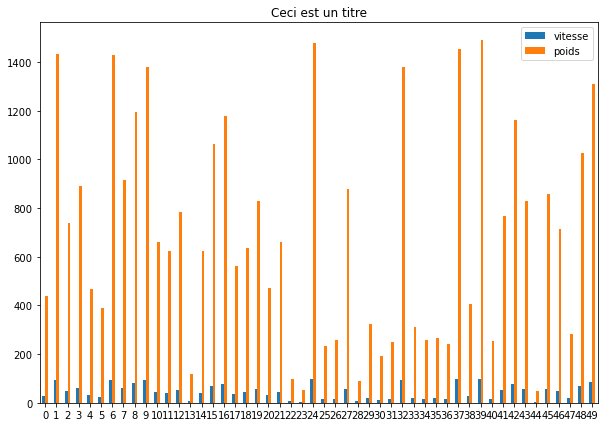

In [3]:
# Exemple 1 --> Observation il prend automatiquement les index comme reference x
display(df.iloc[:,0:2].head(2))
df.iloc[:,0:2].plot(kind="bar",rot=0,title='Ceci est un titre',figsize=(10, 7))

## Exemple 2

<AxesSubplot:>

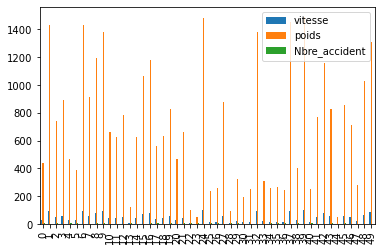

In [4]:
# Exemple 2
df.plot.bar()

## Exemple 3

<AxesSubplot:>

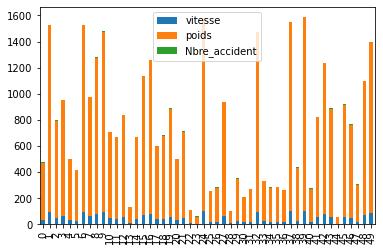

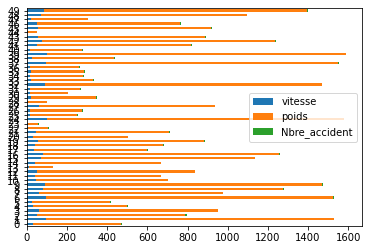

In [5]:
# Exemple 3
df.plot.bar(stacked=True)
df.plot.barh(stacked=True)

## Exemple 4 : D'une variable qualitative

In [6]:
# Exemple 4 - Bar plot avec des catégories
df.head(2)
display(df['category'].value_counts())


Honda     14
Toyota    14
BMW       11
Ford      11
Name: category, dtype: int64

<AxesSubplot:>

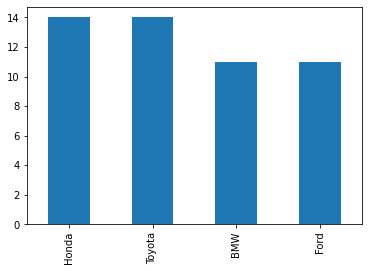

In [7]:
# compte les catégories - trie croissant par défaut 
df['category'].value_counts().plot(kind="bar")


<AxesSubplot:>

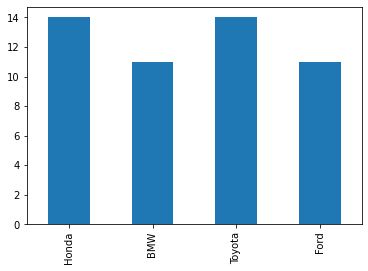

In [9]:
# compte les catégories - trie par catégorie
df['category'].value_counts(sort=False).plot(kind="bar")


<AxesSubplot:>

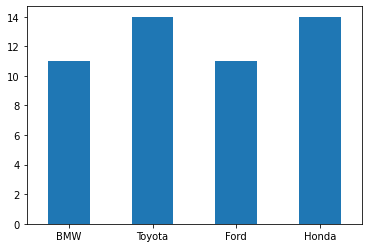

In [10]:
# Choix du Tri
df['category'].value_counts().reindex(["BMW", "Toyota", "Ford","Honda"]).plot(kind="bar", rot=0)


## Exemple 5

,vitesse,poids,Nbre_accident
category,,,
BMW,34.317937,514.769050,4.000000
Ford,43.436713,651.550698,2.545455
Honda,49.702584,745.538757,4.285714
Toyota,52.970639,794.559578,3.642857


<AxesSubplot:xlabel='category'>

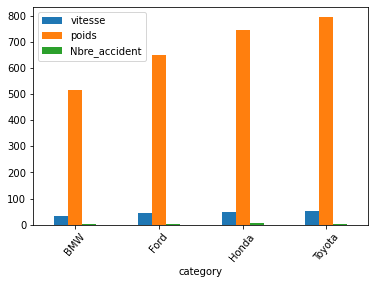

In [8]:
# Exemple 5 - Par groupe avec une somme, mean, etc. 
gpe=df.groupby('category').mean()
display(gpe)

# Vitesse, poids et nbre_accident moyen par category avec la rotation de l'axe x et la legende
gpe.plot.bar(rot=50,legend=True)


<AxesSubplot:xlabel='category'>

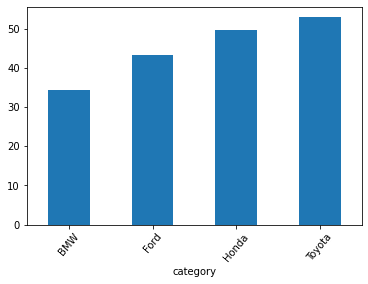

In [11]:
# Vitesse moyenne par category avec la rotation de l'axe x
gpe.loc[:,"vitesse"].plot.bar(rot=50)

## Exemple 6

In [12]:
gpe=df.groupby('category')['vitesse'].agg([np.sum, np.mean, np.std])
gpe

,sum,mean,std
category,,,
BMW,377.497304,34.317937,29.632080
Ford,477.803845,43.436713,24.411397
Honda,695.836174,49.702584,35.475300
Toyota,741.588940,52.970639,27.186590


<AxesSubplot:xlabel='category'>

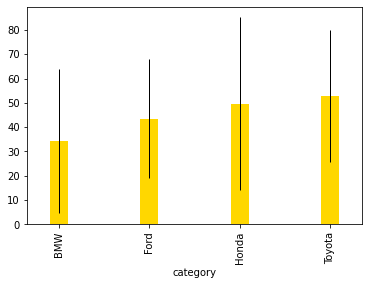

In [13]:
#
gpe.iloc[:,1].plot.bar(yerr=gpe.iloc[:,2],color='gold',error_kw=dict(ecolor='black',elinewidth=1),width=0.2)

## Exemple 7: Deux variables qualitatitives

In [14]:
df_gpe=df.groupby(['category','color'])['vitesse'].agg([np.sum, np.mean, np.std])
df_gpe # Multi-index

sum       mean        std
category color                                  
BMW      Bleu   134.996931  33.749233  30.620713
         Noir   136.627393  68.313697  43.775560
         Rouge  105.872979  21.174596  14.789892
Ford     Bleu   161.678270  32.335654  19.510958
         Noir    89.887046  44.943523  33.152909
         Rouge  226.238529  56.559632  25.998624
Honda    Bleu   131.657275  43.885758  47.449837
         Noir   290.895265  41.556466  34.961274
         Rouge  273.283633  68.320908  29.275432
Toyota   Bleu   415.968760  59.424109  29.726954
         Noir   147.439325  36.859831  27.318042
         Rouge  178.180854  59.393618  17.520481

<AxesSubplot:xlabel='category,color'>

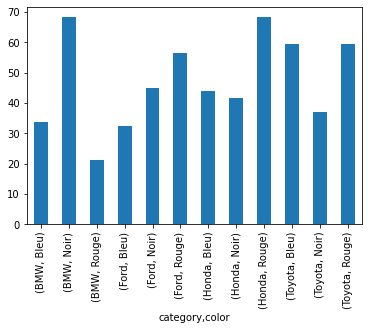

In [15]:
# Vitesse moyenne par Category et par couleur
df_gpe.iloc[:,1].plot.bar()

In [16]:
# Crosstab évite le multi index
# Comptage des category // Group by . sort_counts
pd.crosstab(df.category, df.color)

# Ajout d'une fonction // Groupe by 
moy=pd.crosstab(df.category, df.color, values=df.vitesse,aggfunc=np.mean)
sd=pd.crosstab(df.category, df.color, values=df.vitesse,aggfunc=np.std)
display(moy)
display(sd)

color,Bleu,Noir,Rouge
category,,,
BMW,33.749233,68.313697,21.174596
Ford,32.335654,44.943523,56.559632
Honda,43.885758,41.556466,68.320908
Toyota,59.424109,36.859831,59.393618


color,Bleu,Noir,Rouge
category,,,
BMW,30.620713,43.775560,14.789892
Ford,19.510958,33.152909,25.998624
Honda,47.449837,34.961274,29.275432
Toyota,29.726954,27.318042,17.520481


<AxesSubplot:xlabel='category'>

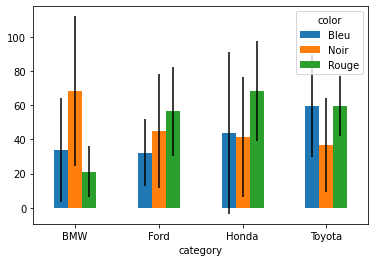

In [17]:
moy.plot.bar(yerr=sd,rot=0)

In [18]:
# Pivot table évite également le multi index
moy2=pd.pivot_table(df[['category','vitesse','color']],index='category', columns=['color'], aggfunc='mean')
# moy2.index

<AxesSubplot:xlabel='category'>

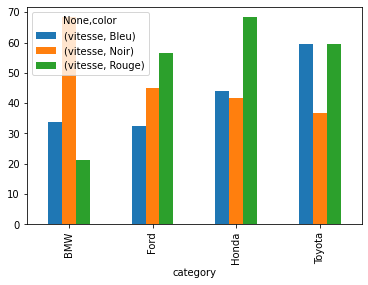

In [19]:
moy2.plot.bar()

## Exemple 8: Subplots

In [20]:
gpe=df.groupby('category')['vitesse'].agg([np.sum, np.mean])
gpe

,sum,mean
category,,
BMW,377.497304,34.317937
Ford,477.803845,43.436713
Honda,695.836174,49.702584
Toyota,741.588940,52.970639


array([<AxesSubplot:title={'center':'sum'}, xlabel='category'>,
       <AxesSubplot:title={'center':'mean'}, xlabel='category'>],
      dtype=object)

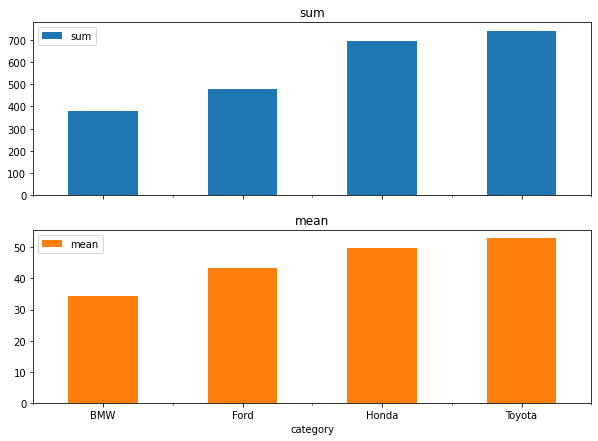

In [21]:
gpe.plot.bar(rot=0, subplots=True, figsize=(10, 7))

RAPPEL: 
* Indexer - catégorie en indexing - travail sur base des lignes

dfbis.set_index('category', inplace=True)

dfbis.head()

* Enlever l'indexation

dfbis.reset_index(inplace = True) # drop = True

dfbis.head()

# Histogram

L’histogramme est utile pour fournir des informations sur la distribution des données.

__Trois manières:__

    df.plot(kind='hist')

    df.plot.hist(stacked=True/False)
    
    df.hist( )


__Syntaxe:__

dataframe.hist (données, column=None, bins=10, kwargs)

    données : Dataframe – C’est le dataframe qui détient les données.

    colonne : str ou séquence – Pour limiter les données au sous-ensemble de colonnes

    bacs : int ou séquence, par défaut est de 10 – Cela nous indique le nombre de bacs d’histogramme à utiliser. Si un entier est donné, les bacs + 1 bords de bac sont calculés et retournés. Si les bacs sont une séquence, donne des bords de bac, y compris le bord gauche du premier bac et le bord droit du dernier bac. Ces bacs aident à construire des histogrammes précis.

    kwargs - Ce paramètre est utilisé pour pointer vers quelques arguments de mots clés supplémentaires utilisés dans la fonction. Pour regarder d’autres paramètres, vous pouvez aller

In [22]:
# Création d'un dataframe
df=pd.DataFrame(
    {
        "vitesse": np.random.randn(1000) + 1,
        "poids": np.random.randn(1000),
        "puissance": np.random.randn(1000) - 1,
    },
     columns=["vitesse", "poids", "puissance"],
 )
df.head(2)

,vitesse,poids,puissance
0,1.936324,0.121711,-1.581092
1,1.306788,2.160587,-4.187131


## Exemple 1

<AxesSubplot:ylabel='Frequency'>

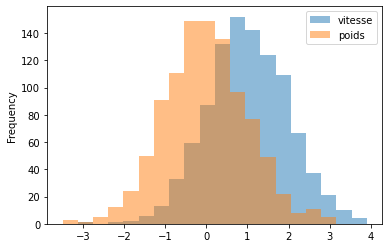

In [23]:
# Histogramme d'une variable continue (une colonne)
df[["vitesse","poids"]].plot(kind='hist', alpha=0.5, bins=20)

## Exemple 2

In [ ]:
df.plot.hist(alpha=0.5);

## Exemple 3

<AxesSubplot:>

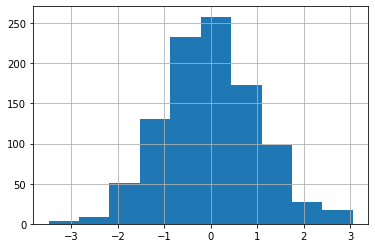

In [25]:
df["poids"].hist(grid=True)

## Exemple 4 : Subplot automatique

array([[<AxesSubplot:title={'center':'vitesse'}>,
        <AxesSubplot:title={'center':'poids'}>],
       [<AxesSubplot:title={'center':'puissance'}>, <AxesSubplot:>]],
      dtype=object)

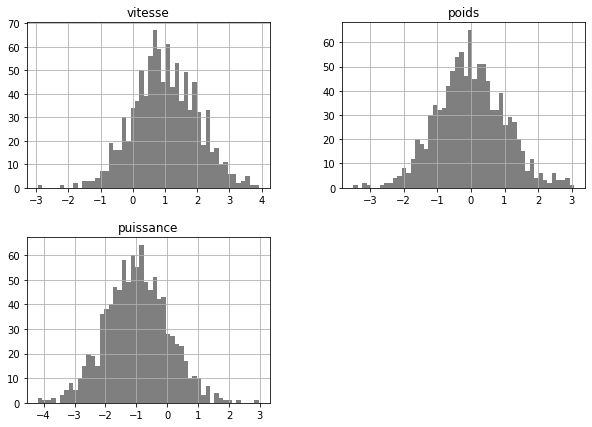

In [26]:
df.hist(color="k", alpha=0.5, bins=50, figsize=(10, 7))

# KDE

Utilisé pour générer Kernel Density Estimate utilisant Gaussian kernels.

__Deux manières:__

    df.plot(kind='kde')

    df.plot.kde( )
    


## Exemple 1

In [27]:
# Création d'un dataframe
df=pd.DataFrame(
    {
        "vitesse": np.random.randn(1000) + 1,
        "poids": np.random.randn(1000),
        "puissance": np.random.randn(1000) - 1,
    },
     columns=["vitesse", "poids", "puissance"],
 )
df.head(2)

,vitesse,poids,puissance
0,1.228523,0.018055,-0.503578
1,0.913742,0.031016,-0.057944


<AxesSubplot:ylabel='Density'>

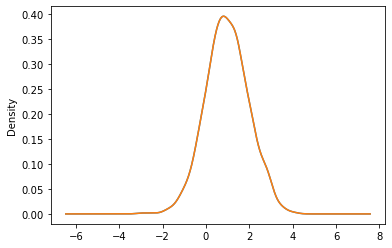

In [28]:
# Simple kde
df["vitesse"].plot(kind='kde')
df["vitesse"].plot.kde()

## Exemple 2 : fusion KDE et Hist

Text(0, 0.5, 'Probability')

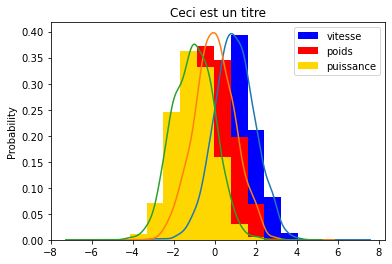

In [29]:
fig, ax = plt.subplots()
df.plot.kde(ax=ax, legend=False, title='Ceci est un titre')
df.plot.hist(density=True, ax=ax, color=['blue', 'red', 'gold'])
ax.set_ylabel('Probability')
#ax.grid(axis='x')

# Line Plot

Un graphique en courbes est un type de graphique qui affiche des informations sous la forme d'une série de points de données appelés « marqueurs » reliés par des segments de ligne droite. 

Utilisez un tracé linéaire lorsque vous disposez d'un ensemble de données continu. 

Ceux-ci sont les mieux adaptés aux visualisations de données basées sur les tendances sur une période de temps.

__Deux manières:__

    df.plot(kind='line')

    df.plot.line( )
    

In [37]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame(np.random.rand(50, 1)*100, columns=['Nombre'])
df["Date"] = pd.date_range('2019-01-01', periods=50)
df=df.set_index("Date")
df.head()

,Nombre
Date,
2019-01-01,44.418824
2019-01-02,34.240205
2019-01-03,84.730769
2019-01-04,71.548342
2019-01-05,30.670172


## Exemple 1

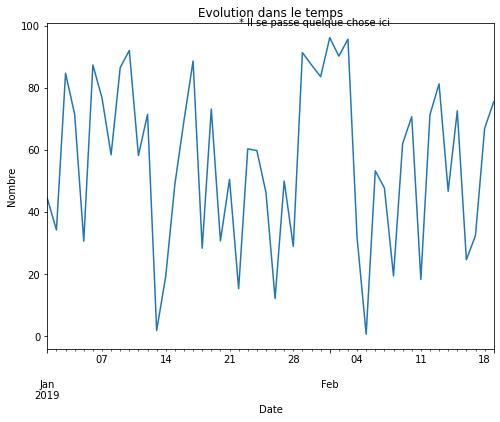

In [39]:
df.plot(kind='line', figsize=(8,6), legend=False)
plt.title('Evolution dans le temps')
plt.ylabel('Nombre')
plt.xlabel('Date')
plt.text("2019-01-22", 100, '* Il se passe quelque chose ici') # see note below
plt.show() 

# Scatter Plot

Le scatter plot (Nuage de points) est une méthode utile pour comparer les variables les unes par rapport aux autres. Les diagrammes de dispersion ressemblent aux diagrammes linéaires dans la mesure où ils mappent des variables indépendantes et dépendantes sur un graphique 2D. 

Alors que les points de données sont reliés entre eux par une ligne dans un line plot, ils ne sont pas connectés dans un nuage de points. 

Les données d'un scatter plot sont considérées comme exprimant une tendance. Avec une analyse plus poussée à l'aide d'outils tels que la régression, nous pouvons calculer mathématiquement cette relation et l'utiliser pour prédire les tendances en dehors de l'ensemble de données. 

Obtenez l'équation de la droite la mieux ajustée. Nous utiliserons la méthode polyfit() de Numpy en passant ce qui suit : 

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

__Deux manières:__

    df.plot(kind='scatter')

    df.plot.scatter( )
    

In [40]:
# Création d'un dataframe
df=pd.DataFrame(np.random.rand(50,1)*100, columns=['vitesse'])
df['poids']=df['vitesse']*15
df['Nbre_accident']=np.random.randint(10, size=50)
df['category']=np.random.choice(['Ford','BMW', 'Honda','Toyota'], size=50)
df['color']=np.random.choice(['Bleu','Rouge', 'Noir'], size=50)
df.head()

,vitesse,poids,Nbre_accident,category,color
0,2.347595,35.213930,1,BMW,Noir
1,64.201785,963.026779,8,Ford,Rouge
2,37.272193,559.082896,4,Ford,Rouge
3,18.169002,272.535033,3,Toyota,Bleu
4,76.260166,1143.902487,0,Ford,Bleu


## Exemple 1

In [42]:
x = df['poids']      # on x-axis
y = df['vitesse']     #  on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 6.66666667e-02, -8.03887339e-15])

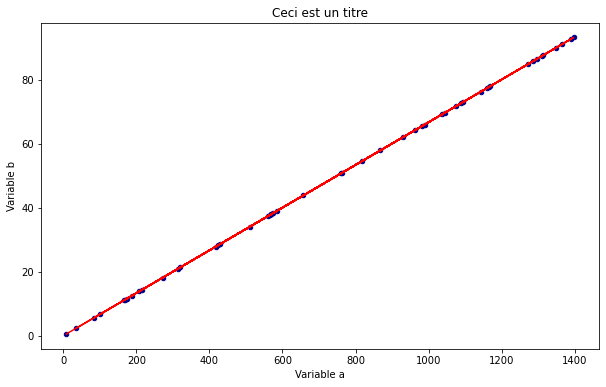

In [43]:

df.plot(kind='scatter', x='poids', y='vitesse', figsize=(10, 6), color='darkblue')

plt.title('Ceci est un titre')
plt.xlabel('Variable a')
plt.ylabel('Variable b')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') 
plt.show()

# Bubble Plots

C'est une variante du scatter plot qui affiche trois dimensions de données (x, y, z). 

Les points de données sont remplacés par des bulles et la taille de la bulle est déterminée par la troisième variable z, également appelée poids. 

Dans maplotlib, nous pouvons passer un tableau ou un scalaire au paramètre s à plot(), qui contient le poids de chaque point.

## Exemple 1

<AxesSubplot:xlabel='vitesse', ylabel='poids'>

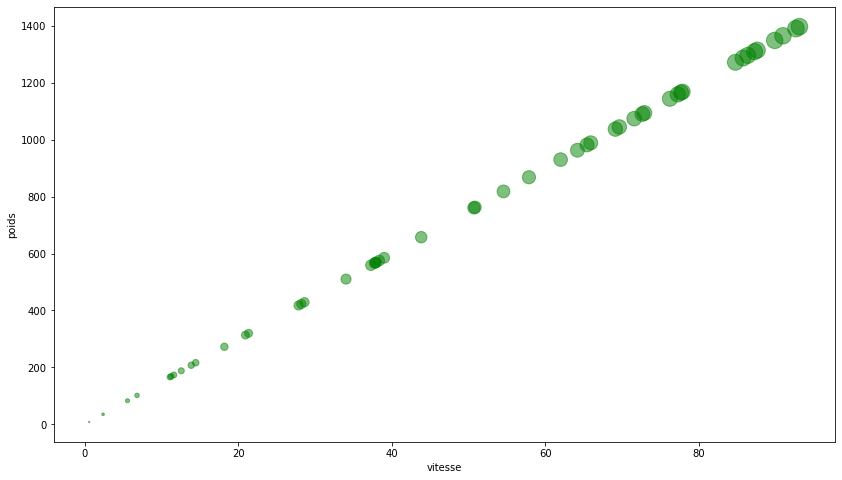

In [45]:
df.plot(kind='scatter',
                    x='vitesse',
                    y='poids',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=df['vitesse']*3  # pass in weights 
                    )

# Hexbin Plot
## Exemple 1

In [46]:
# Création d'un dataframe
df=pd.DataFrame({'Variable1':np.random.randn(1000), 'variable2':np.random.randn(1000)})
df.head()

,Variable1,variable2
0,-0.680282,-0.595946
1,0.093587,0.484297
2,1.153597,-1.754696
3,2.142838,1.940277
4,0.255760,0.719944


<AxesSubplot:xlabel='Variable1', ylabel='variable2'>

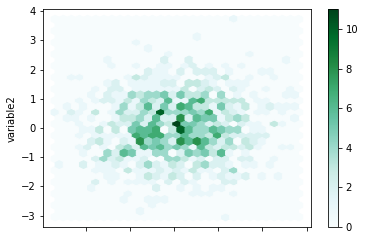

In [47]:
df.plot.hexbin(x='Variable1', y='variable2', gridsize=30)

# Area Plot

Les Area plot  sont empilés (stacked) par défaut. Et pour produire a stacked area plot (un graphique en aires empilées), chaque colonne doit contenir toutes des valeurs positives ou toutes négatives (tout NaN, c'est-à-dire sans nombre, les valeurs seront par défaut 0). Pour produire un tracé no stacked, définissez le paramètre stacked avec la valeur False. 

In [48]:
# Création d'un dataframe
df=pd.DataFrame(np.random.rand(50,1)*100, columns=['vitesse'])
df['poids']=np.random.rand(50,1)*100
df['Nbre_accident']=np.random.randint(10, size=50)
df['category']=np.random.choice(['Ford','BMW', 'Honda','Toyota'], size=50)
df['color']=np.random.choice(['Bleu','Rouge', 'Noir'], size=50)
df.head()

,vitesse,poids,Nbre_accident,category,color
0,47.263035,66.869696,9,Honda,Rouge
1,91.979514,87.127127,6,BMW,Rouge
2,97.506736,55.104099,6,Toyota,Bleu
3,19.468115,3.151682,0,Honda,Noir
4,74.805153,34.030663,2,BMW,Rouge



## Exemple 1

<AxesSubplot:>

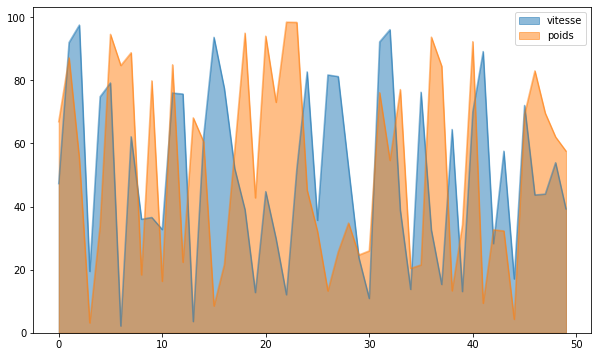

In [49]:
df[["vitesse", "poids"]].plot(kind='area',
             stacked=False,
             figsize=(10, 6))

<AxesSubplot:>

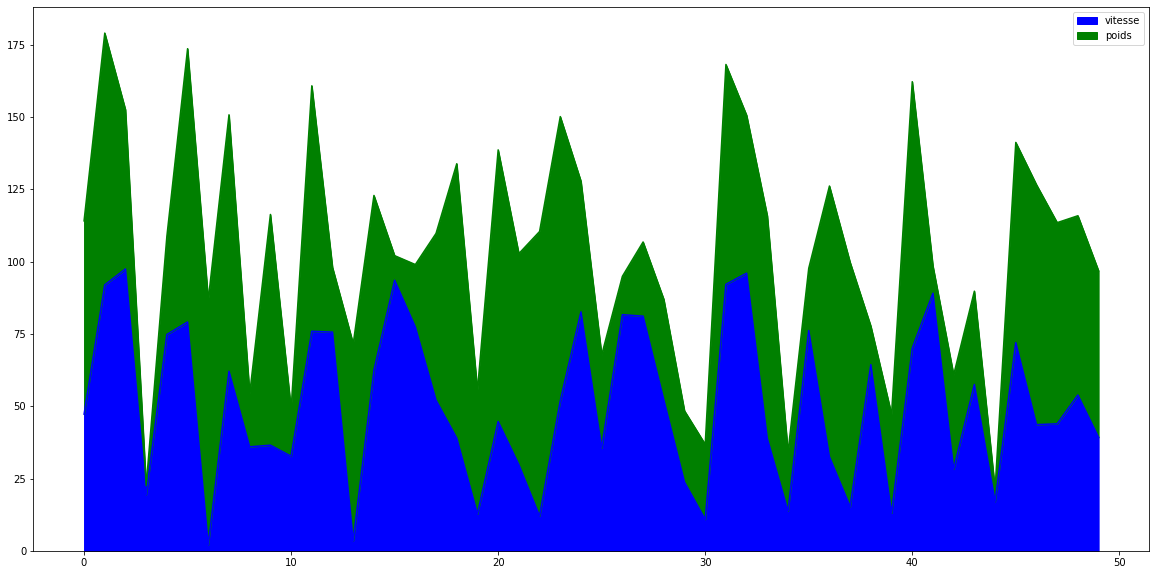

In [50]:
df[["vitesse", "poids"]].plot(kind='area',
             stacked=True,
             figsize=(20, 10), color=["b", "g"])

# BoxPlot

C'est un moyen de représenter statistiquement la distribution des données

__Trois manières:__

    data.plot(kind='box')

    df.plot.box(stacked=True/False)

    df.boxplot( )

In [51]:
# Création d'un dataframe
df=pd.DataFrame(np.random.rand(50,1)*100, columns=['vitesse'])
df['poids']=df['vitesse']*15
df['Nbre_accident']=np.random.randint(10, size=50)
df['category']=np.random.choice(['Ford','BMW', 'Honda','Toyota'], size=50)
df['color']=np.random.choice(['Bleu','Rouge', 'Noir'], size=50)
df.head()

,vitesse,poids,Nbre_accident,category,color
0,59.167378,887.510670,7,Honda,Bleu
1,30.608862,459.132929,4,Toyota,Noir
2,58.428569,876.428536,5,Honda,Rouge
3,26.754923,401.323851,1,BMW,Rouge
4,39.775592,596.633881,2,Ford,Rouge


## Exemple 1 - Variable quantitative

<AxesSubplot:>

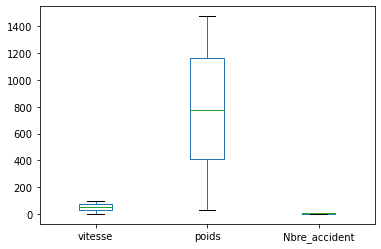

In [52]:
# Exemple 1 - Prend automatiquement toutes les colonnes numeriques
df.plot(kind='box',vert=True)

## Exemple 2 - Variable qualitatitive

<AxesSubplot:title={'center':'Nbre_accident'}, xlabel='[category]'>

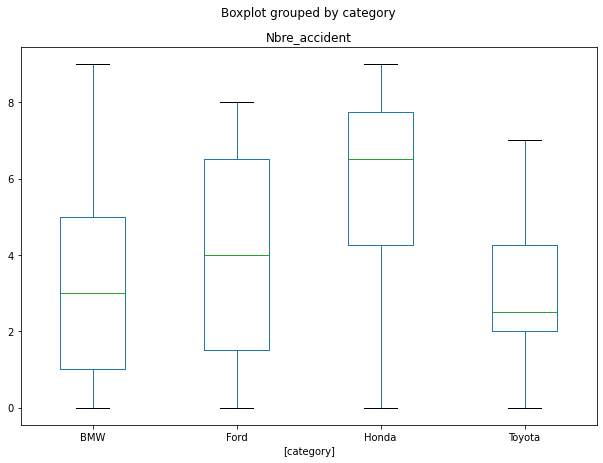

In [53]:
# Exemple 2
df[["Nbre_accident","category"]].boxplot(by="category", grid=False, figsize=(10, 7))

## Exemple 3

<AxesSubplot:>

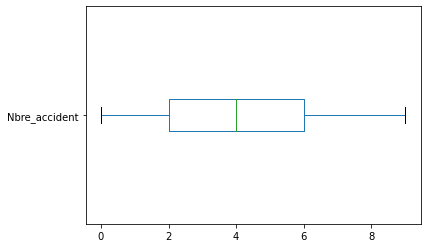

In [55]:
df[["Nbre_accident","category"]].plot(kind='box',vert=False, by="category")

# Pie Plot


*   `autopct` -  is a string or function used to label the wedges with their numeric value. The label will be placed inside the wedge. If it is a format string, the label will be `fmt%pct`.
*   `startangle` - rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
*   `shadow` - Draws a shadow beneath the pie (to give a 3D feel).

In [56]:
# Création d'un dataframe
df=pd.DataFrame(np.random.rand(50,1)*100, columns=['vitesse'])
df['poids']=df['vitesse']*15
df['Nbre_accident']=np.random.randint(10, size=50)
df['category']=np.random.choice(['Ford','BMW', 'Honda','Toyota'], size=50)
df['color']=np.random.choice(['Bleu','Rouge', 'Noir'], size=50)
df.head()

,vitesse,poids,Nbre_accident,category,color
0,1.180741,17.711120,9,Honda,Noir
1,66.210242,993.153623,5,Ford,Noir
2,24.582765,368.741471,2,Ford,Bleu
3,33.931531,508.972962,8,Ford,Rouge
4,9.573540,143.603100,1,Toyota,Noir


## Exemple 1

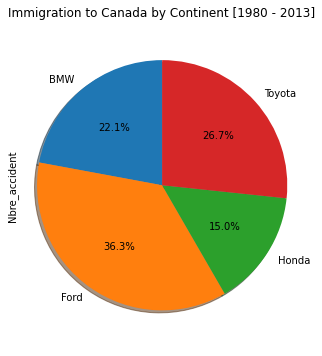

In [57]:
df.groupby(['category'])['Nbre_accident'].sum().plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

## Exemple 2

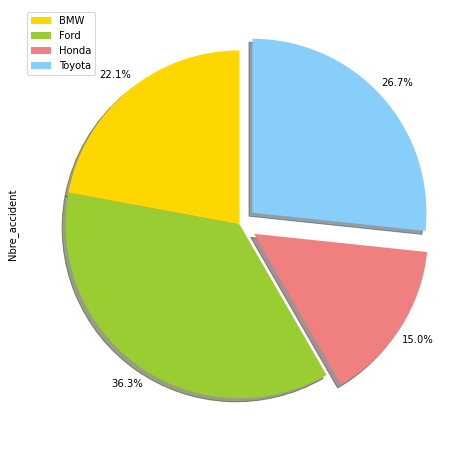

In [58]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode_list = [0, 0, 0.1, 0.1] # ratio with which to offset each wedge.

df.groupby(['category'])['Nbre_accident'].sum().plot(kind='pie',
                            figsize=(16, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode
                            )
plt.legend(labels=df.groupby(['category'])['Nbre_accident'].sum().index, loc="upper left") 

plt.show()

# Word Cloud
`Word` clouds (également appelés nuages de mots, de texte) fonctionnent de manière simple : plus un mot spécifique apparaît dans une source de données textuelles (telle qu'un discours, un livre, un article de blog ou une base de données), plus il est gros et important. 

Source: https://github.com/amueller/word_cloud/

In [ ]:
# install wordcloud
! pip3 install wordcloud

In [4]:


# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


Essayons d'analyser un court roman écrit par Lewis Carroll intitulé Alice's Adventures in Wonderland.

In [5]:
import urllib

# open the file and read it into a variable alice_novel
alice_novel = urllib.request.urlopen('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/alice_novel.txt').read().decode("utf-8")

In [8]:
import matplotlib.pyplot as plt

In [11]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=10

)

# generate the word cloud
alice_wc.generate(alice_novel)

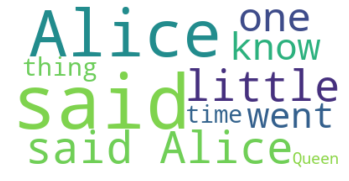

In [14]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()